<a href="https://colab.research.google.com/github/szyrek/sentiment_anal/blob/main/GradientDescent.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


**Linear regression** is a basic and commonly used type of predictive analysis. It's used to model the relationship between two variables by fitting a linear equation to observed data. One variable is considered to be an independent variable (often denoted as "X") and the other is considered to be a dependent variable (often denoted as "y").

The equation of a simple linear regression model is given by:

$y = mx + b$

Where:

y is the dependent variable.

x is the independent variable.

m is the slope of the line.

b is the y-intercept.

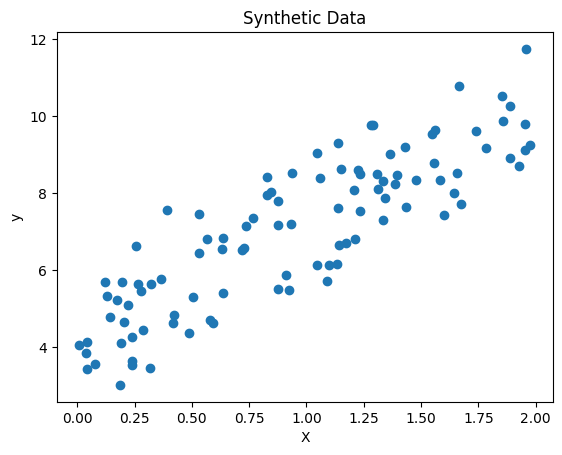

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Generate synthetic data
np.random.seed(0)
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

# Plot the data
plt.scatter(X, y)
plt.xlabel('X')
plt.ylabel('y')
plt.title('Synthetic Data')
plt.show()


**Ordinary Least Squares (OLS) Method:**

The Ordinary Least Squares method aims to minimize the sum of squared differences between the observed and predicted values. This is achieved by finding the values of m and b that minimize the sum of the squared residuals.

In [2]:
# Add bias term to X
X_b = np.c_[np.ones((100, 1)), X]

# Calculate parameters using OLS method
theta_ols = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

# Extract slope and intercept
m_ols, b_ols = theta_ols[1], theta_ols[0]

print("Parameters calculated using Ordinary Least Squares:")
print("Slope (m_ols):", m_ols)
print("Intercept (b_ols):", b_ols)


Parameters calculated using Ordinary Least Squares:
Slope (m_ols): [2.96846751]
Intercept (b_ols): [4.22215108]


**Gradient Descent for Linear Regression:**

Gradient descent is an optimization algorithm used to minimize some function by iteratively moving in the direction of steepest descent. In the context of linear regression, we can use gradient descent to find the values of m and b that minimize the cost function, which measures the difference between the predicted and actual values.

We update m and b using the following formulas:

$m:=m−α
N
1
​
 ∑
i=1
N
​
 (y
(i)
 −(mx
(i)
 +b))x
(i)$

$b:=b−α
N
1
​
 ∑
i=1
N
​
 (y
(i)
 −(mx
(i)
 +b))$

Where:

α is the learning rate.

N is the number of data points.

(x (i),y (i)) are the observations.


**Batch Gradient Descent:**

In Batch Gradient Descent, the parameters are updated using the gradients of the cost function with respect to the entire training dataset. It computes the gradient of the cost function with respect to the parameters for the entire training dataset at each step.

**Batch Gradient Descent Algorithm:**

1. Initialize the parameters randomly or with some predefined values.
2. Calculate the gradient of the cost function with respect to the parameters using the entire training dataset.
3. Update the parameters in the opposite direction of the gradient by a certain step size (learning rate).
4. Repeat steps 2 and 3 until convergence or for a fixed number of iterations.

In [8]:
# Batch Gradient Descent
def batch_gradient_descent(X, y, theta, alpha, iterations):
    m = len(y)
    for iteration in range(iterations):
        gradients = 2/m * X.T.dot(X.dot(theta) - y)
        theta -= alpha * gradients
    return theta

# Initialize parameters and hyperparameters
theta_batch = np.random.randn(2, 1)
alpha = 0.01
iterations = 1000

# Perform Batch Gradient Descent
theta_batch = batch_gradient_descent(X_b, y, theta_batch, alpha, iterations)

# Extract slope and intercept
m_gd, b_gd = theta_batch[1], theta_batch[0]

print("Parameters calculated using Batch Gradient Descent:")
print("Slope (m_batch):", m_gd)
print("Intercept (b_batch):", b_gd)


Parameters calculated using Batch Gradient Descent:
Slope (m_batch): [2.98789087]
Intercept (b_batch): [4.20026141]


**Stochastic Gradient Descent (SGD):**

In Stochastic Gradient Descent, the parameters are updated using the gradient of the cost function with respect to a single training example at each iteration. It's computationally less expensive than Batch Gradient Descent but may exhibit more variance in the parameter updates.

**Stochastic Gradient Descent Algorithm:**

1. Initialize the parameters randomly or with some predefined values.
2. Shuffle the training dataset.
3. For each training example in the dataset:
- Calculate the gradient of the cost function with respect to the parameters for the current training example.
- Update the parameters in the opposite direction of the gradient by a certain step size (learning rate).
4. Repeat step 3 for a fixed number of iterations or until convergence.

In [6]:
# Stochastic Gradient Descent (SGD)
def stochastic_gradient_descent(X, y, theta, alpha, iterations):
    m = len(y)
    for iteration in range(iterations):
        for i in range(m):
            random_index = np.random.randint(m)
            xi = X[random_index:random_index+1]
            yi = y[random_index:random_index+1]
            gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
            theta -= alpha * gradients
    return theta

# Initialize parameters and hyperparameters
theta_sgd = np.random.randn(2, 1)
alpha = 0.01
iterations = 1000

# Perform Stochastic Gradient Descent
theta_sgd = stochastic_gradient_descent(X_b, y, theta_sgd, alpha, iterations)

# Extract slope and intercept
m_sgd, b_sgd = theta_sgd[1], theta_sgd[0]

print("Parameters calculated using Stochastic Gradient Descent:")
print("Slope (m_sgd):", m_sgd)
print("Intercept (b_sgd):", b_sgd)


Parameters calculated using Stochastic Gradient Descent:
Slope (m_sgd): [3.04404191]
Intercept (b_sgd): [4.24553845]


**Mini-batch Gradient Descent:**

In Mini-batch Gradient Descent, the parameters are updated using the gradient of the cost function with respect to a small batch of training examples at each iteration. It's a compromise between Batch Gradient Descent and Stochastic Gradient Descent.

**Mini-batch Gradient Descent Algorithm:**

1. Initialize the parameters randomly or with some predefined values.
2. Shuffle the training dataset.
3. Split the shuffled dataset into mini-batches.
4. For each mini-batch in the dataset:
- Calculate the gradient of the cost function with respect to the parameters for the current mini-batch.
- Update the parameters in the opposite direction of the gradient by a certain step size (learning rate).
5. Repeat step 4 for a fixed number of iterations or until convergence.

In [7]:
# Mini-batch Gradient Descent
def minibatch_gradient_descent(X, y, theta, alpha, iterations, batch_size):
    m = len(y)
    for iteration in range(iterations):
        shuffled_indices = np.random.permutation(m)
        X_shuffled = X[shuffled_indices]
        y_shuffled = y[shuffled_indices]
        for i in range(0, m, batch_size):
            xi = X_shuffled[i:i+batch_size]
            yi = y_shuffled[i:i+batch_size]
            gradients = 2/batch_size * xi.T.dot(xi.dot(theta) - yi)
            theta -= alpha * gradients
    return theta

# Initialize parameters and hyperparameters
theta_minibatch = np.random.randn(2, 1)
alpha = 0.01
iterations = 1000
batch_size = 10

# Perform Mini-batch Gradient Descent
theta_minibatch = minibatch_gradient_descent(X_b, y, theta_minibatch, alpha, iterations, batch_size)

# Extract slope and intercept
m_minibatch, b_minibatch = theta_minibatch[1], theta_minibatch[0]

print("Parameters calculated using Mini-batch Gradient Descent:")
print("Slope (m_minibatch):", m_minibatch)
print("Intercept (b_minibatch):", b_minibatch)


Parameters calculated using Mini-batch Gradient Descent:
Slope (m_minibatch): [2.96941494]
Intercept (b_minibatch): [4.2231644]


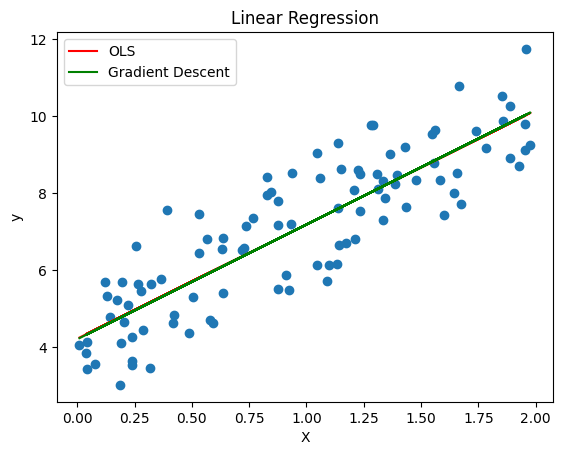

In [4]:
# Plot the data and the fitted line
plt.scatter(X, y)
plt.plot(X, X_b.dot(theta_ols), label='OLS', color='red')
plt.plot(X, X_b.dot(theta_gd), label='Gradient Descent', color='green')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Linear Regression')
plt.legend()
plt.show()
